
#**Hierarchical Clustering**
Hierarchical clustering is where we build a cluster tree (dendrogram) to represent data, where each group (node) is linked to two or more
successor groups.



*   The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.
*  Each node in the cluster tree contains a group of similar data; nodes are placed on the graph next to other similar nodes.


*  Clusters at one level are joined with clusters in the next level up, using a degree of similarity. 
*   The process carries on until all nodes are in the tree, which gives a visual snapshot of the data contained in the whole set.

*   The total number of clusters is not predetermined before you start the tree creation

##**Implementing Hierarchical Clustering**
There are two major ways in which hierarchical clustering can be carried out:
1. Agglomerative or Bottom-Up Clustering
2. Divisive or Top-Down Clustering

##**Agglomerative (Bottom-Up) Clustering**

1. Start with each example in its own singleton cluster
2. At each time-step, greedily merge two most similar clusters
3. Stop when there is a single cluster of all examples, else go to two

##**Divisive (Top-Down) Clustering**
1. Start with all examples in the same cluster
2. At each time-step, remove the “outsiders” from the least cohesive cluster
3. Stop when each example is in its own singleton cluster, else go to two

#for more theory refer below
https://www.javatpoint.com/hierarchical-clustering-in-machine-learning








In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris


In the above code, we are using the sklearn library, which contains a lot of tools for machine learning and statistical modeling, including
classification, regression, clustering, and dimensionality reduction.

In [2]:
iris=load_iris()

Load_iris is a function from sklearn that loads and returns the iris dataset. The libraries used above already contains it. Just by loading the
library, a data frame named "iris" will be made available and can be used straight away.

In [3]:
X=iris.data
y=iris.target

In [4]:
#Import dendrogram and linkage module from scipy library
from scipy.cluster.hierarchy import dendrogram,linkage

In [5]:
#Generate the linkage matrix
Z=linkage(X,'average')

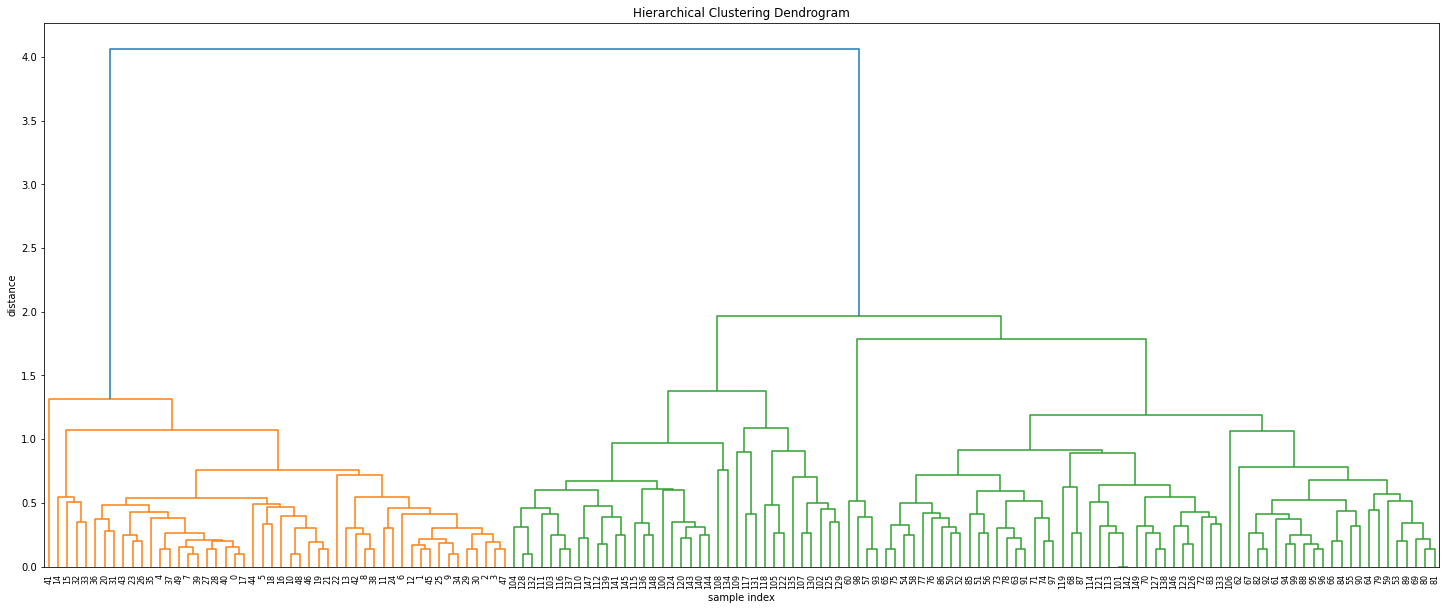

In [6]:

#Calculate full dendrogram
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z,
           leaf_rotation=90., #Rotates the x axis labels
           leaf_font_size=8., #font size for the x axis labels
           )
plt.show()

Now we are going to see the concept of Agglomerative (Bottom-Up) Clustering with a business use case.


##**Problem Statement**:
An ecommerce company has prepared a rough dataset containing shopping details of their customers, which includes CustomerID, Genre,
Age, Annual Income (k$), Spending Score (1-100). The company is unable to target a specific set of customers with a particular set of SKUs.
##**Objective**:
Segment customers into different groups based on their shopping trends.
##**Dataset**
Before reading the data from a .csv file, you need to download "housing_data.csv" dataset from the course resource and upload it into the
lab. We must use the Up arrow icon, which is shown in the left side under View icon. Click on the Up arrow icon and upload the file
wherever it is downloaded into your system.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
customer_data=pd.read_csv('/content/drive/MyDrive/machine learning/machine learning/Datasets/LVC Datasets/Lesson 5/Dataset/shopping_data.csv')

In the above code, pd.read_csv function is used to read the "shopping_data.csv" file, and customer_data is a variable that will store the data
read by the .csv file.

In [9]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
customer_data.shape

(200, 5)

Here, shape is an attribute that returns a tuple representing the dimensionality of the customer_data. It is used to define the number of
rows and columns in customer_data.

Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. To view the results in two-dimensional feature
space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column. We will retain the Annual
Income (in thousands of dollars) and Spending Score (1-100) columns. The Spending Score column signifies how often a person spends
money in a mall on a scale of 1 to 100 with 100 being the highest spender. Execute the following script to filter the first three columns from
our dataset:


In [11]:
data=customer_data.iloc[:,3:5].values

Next, we need to know the clusters that we want our data to be split to. We will again use the scipy library to create the dendrograms for
our dataset. Execute the following script to do so:


In [12]:
data.shape

(200, 2)

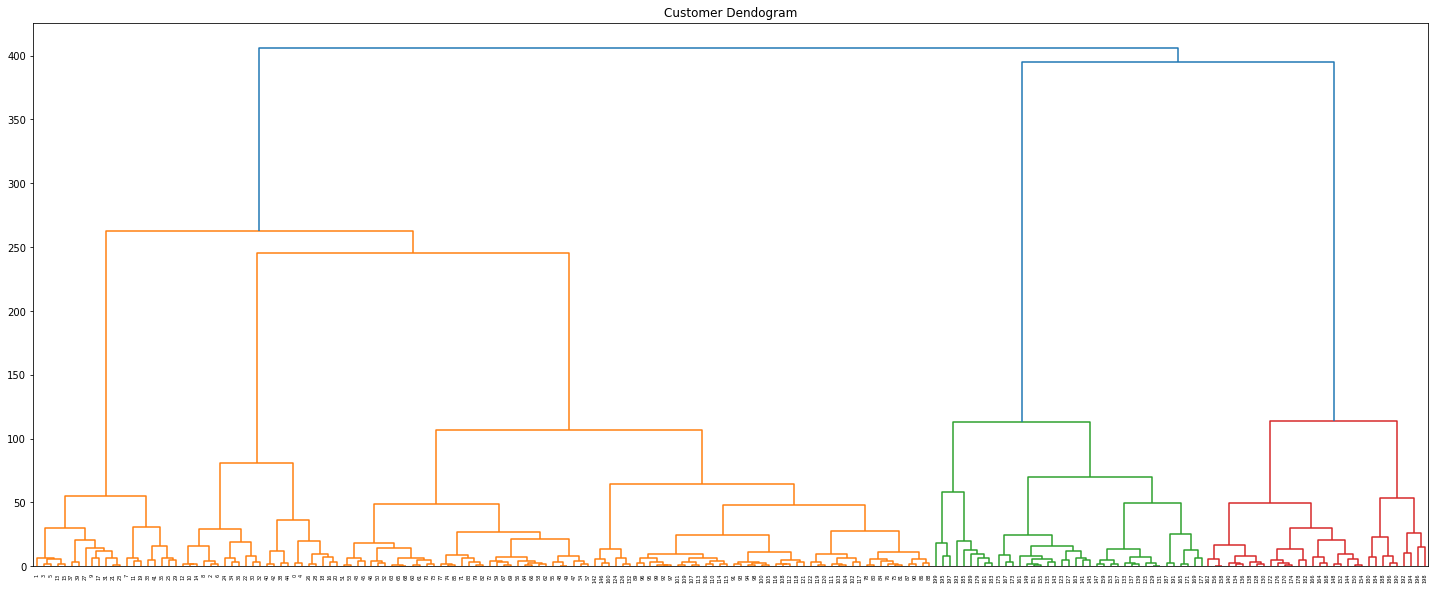

In [13]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(25,10))
plt.title('Customer Dendogram')
dend = shc.dendrogram(shc.linkage(data,method='ward'))

If we draw a horizontal line that passes through longest distance without a horizontal line, we get 5 clusters.
We create an instance of Agglomerative Clustering using the euclidean distance as the measure of distance between points and ward
linkage to calculate the proximity of clusters.

In [14]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

You can see the cluster labels from all of your data points. Since we had five clusters, we have five labels in the output i.e. 0 to 4.
As a final step, let's plot the clusters to see how actually our data has been clustered:

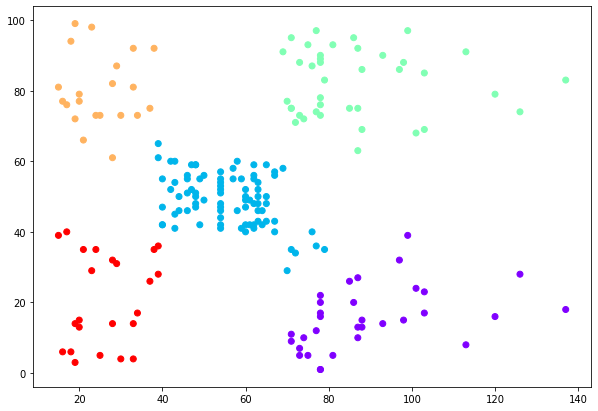

In [15]:
plt.figure(figsize=(10,7))
plt.scatter(data[:,0],data[:,1],c=cluster.labels_,cmap='rainbow')

##**Conclusion**
When the shopping data is grouped using the agglomerative clustering technique, we can observe that there are five groups for
consumers whose labels range from 0 to 4